In [91]:
import zipfile
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

z = zipfile.ZipFile('training.zip')
train = pd.read_csv(z.open('training.csv'))
z = zipfile.ZipFile('test.zip')
test = pd.read_csv(z.open('test.csv'))
print(train.shape)
print(test.shape)
print(train[0:10])

(7049, 31)
(1783, 2)
   left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   
5          69.680748          39.968748           29.183551   
6          64.131866          34.290040           29.578953   
7          67.468893          39.413452           29.355961   
8          65.802880          34.755200           27.475840   
9          64.121231          36.740308           29.468923   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000              

In [92]:
#pairwise keypoint features
keypoint_list = ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y',
                'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y',
                'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y',
                'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y',
                'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y',
                'nose_tip_x', 'nose_tip_y',
                'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y',
                'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y']
from itertools import izip

def pairwise(iterable):
    a = iter(iterable)
    return izip(a, a)

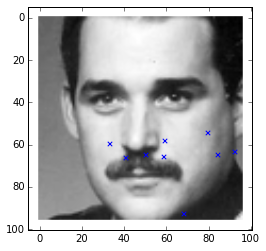

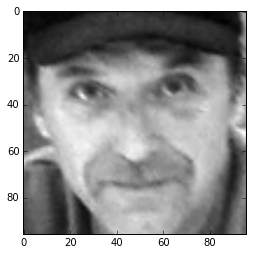

In [95]:
#check image data
id_check = 1877
plt.figure(1)
plt.imshow(np.asarray(train['Image'][id_check].split(' '), float).reshape(96,96), cmap='gray')
for axis_x, axis_y in pairwise(keypoint_list):
    plt.scatter(train[axis_x][id_check], train[axis_y][id_check], marker='x', s=20)

id_check = 1001
plt.figure(2)
plt.imshow(np.asarray(test['Image'][id_check].split(' '), float).reshape(96,96), cmap='gray')

In [100]:
train['ImageUnpacked'] = train['Image'].apply(lambda im: np.fromstring(im, sep=' '))
train = train.dropna()
print(train.shape)
test['ImageUnpacked'] = test['Image'].apply(lambda im: np.fromstring(im, sep=' '))

(2140, 32)


In [102]:
X_train = np.vstack(train['ImageUnpacked'].values) / 255.
y_train = (train[keypoint_list].values - 48.) / 48.
X_test = np.vstack(test['ImageUnpacked'].values) / 255.
print(X_train[0])
print(y_train[0])
print(X_test[0])

[ 0.93333333  0.9254902   0.92941176 ...,  0.2745098   0.29411765
  0.35294118]
[ 0.37569925 -0.18745263 -0.37027068 -0.24121504  0.24129323 -0.17401203
  0.52354887 -0.16729173 -0.24257143 -0.22105414 -0.5113985  -0.22105414
  0.18652632 -0.39513233  0.6713985  -0.32858045 -0.16192481 -0.39578496
 -0.65924211 -0.38234436 -0.07457143  0.18889173  0.27490226  0.66604511
 -0.40386466  0.61227068 -0.09765414  0.51948872 -0.10144361  0.7601203 ]
[ 0.71372549  0.71764706  0.71372549 ...,  0.03137255  0.01960784
  0.01960784]


In [104]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(2140, 9216)
(2140, 30)
(1783, 9216)
